# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from matplotlib.pyplot import figure
from sklearn import preprocessing

/Users/samanthashih/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [59]:
from matplotlib import axes
from matplotlib import axis

# Extract data from CSV

In [7]:
# Read norfolk.csv into a DataFrame called norfolk_df
norfolk_df = pd.read_excel('./data/norfolk.xlsx')
norfolk_df

,Received Date,Id Cs,Id Prsn,Code Sex,Code Rc,Case Status,Case Type,Crime Type,Nmbr Cnt,Nmbr Sub Cnt,...,Nmbr Impsd Cmnty Srvc Min Unt,Nmbr Day Jl Impsd,Nmbr Day Jl Impsd Unt,Nmbr Day Jl Spnd Impsd,Nmbr Day Jl Spnd Impsd Unt,Nmbr Day Actl Jl Impsd,Nmbr Day Actl Jl Impsd Unt,Nmbr Impsd Cmnty Srvc,Nmbr Impsd Cmnty Srvc Unt,Code Jdg Dspstn
0,2005-12-30,94321,125095,M,C,DISP,GN,MMVE,2,0,...,D,NaN,D,NaN,D,NaN,D,NaN,D,NaN
1,2005-12-30,94321,125095,M,C,DISP,GN,MMVE,1,0,...,D,NaN,D,NaN,D,NaN,D,NaN,D,NaN
2,2011-04-26,182565,125095,M,C,DISP,GN,LARC,1,0,...,D,NaN,D,NaN,D,NaN,D,NaN,D,NaN
3,2011-07-08,185454,125095,M,C,O,GN,OUID,2,0,...,D,NaN,D,NaN,D,NaN,D,NaN,D,NaN
4,2011-07-08,185454,125095,M,C,O,GN,OUID,1,0,...,D,NaN,D,NaN,D,NaN,D,NaN,D,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505573,2022-01-24,322334,389051,M,C,DISP,GN,MMVE,1,0,...,D,NaN,D,NaN,D,NaN,D,NaN,D,NaN
505574,2022-01-24,322334,389051,M,C,DISP,GN,MMVE,2,0,...,D,NaN,D,NaN,D,NaN,D,NaN,D,NaN
505575,2022-01-24,322341,389052,NaN,NaN,O,GN,LARC,1,0,...,D,NaN,D,NaN,D,NaN,D,NaN,D,NaN
505576,2022-01-24,322340,389053,M,C,WARR,DV,ASBA,1,0,...,D,NaN,D,NaN,D,NaN,D,NaN,D,NaN


# Data Analysis

In [8]:
norfolk_df.columns

Index(['Received Date', 'Id Cs', 'Id Prsn', 'Code Sex', 'Code Rc',
       'Case Status', 'Case Type', 'Crime Type', 'Nmbr Cnt', 'Nmbr Sub Cnt',
       'Date Dspstn', 'Code Dspstn', 'Desc Dspstn', 'Code Rsn Dspstn',
       'Code Crt Lctn Disp', 'Date Crm', 'Code Ofcr Agncy', 'Charge',
       'Charge Description', 'Code Fclty', 'Code Lf', 'Date Exctn',
       'Nmbr Day Jl Impsd Min', 'Nmbr Day Jl Impsd Min Unt',
       'Nmbr Day Jl Spnd Impsd Min', 'Nmbr Day Jl Spnd Impsd Min Unt',
       'Nmbr Day Actl Jl Impsd Min', 'Nmbr Day Actl Jl Impsd Min Unt',
       'Nmbr Impsd Cmnty Srvc Min', 'Nmbr Impsd Cmnty Srvc Min Unt',
       'Nmbr Day Jl Impsd', 'Nmbr Day Jl Impsd Unt', 'Nmbr Day Jl Spnd Impsd',
       'Nmbr Day Jl Spnd Impsd Unt', 'Nmbr Day Actl Jl Impsd',
       'Nmbr Day Actl Jl Impsd Unt', 'Nmbr Impsd Cmnty Srvc',
       'Nmbr Impsd Cmnty Srvc Unt', 'Code Jdg Dspstn'],
      dtype='object')

In [17]:
norfolk = norfolk_df[['Id Cs', 'Date Crm', 'Code Crt Lctn Disp', 'Charge', 'Code Rc', 'Code Dspstn']]
norfolk.head()

,Id Cs,Date Crm,Code Crt Lctn Disp,Charge,Code Rc,Code Dspstn
0,94321,2005-08-16 12:00AM,QDC,90/24/E,C,PLEA
1,94321,2005-08-16 12:00AM,QDC,89/4A,C,RESF
2,182565,2011-02-28 12:00AM,NaN,266/28/B,C,DISM
3,185454,2011-06-24 12:00AM,NaN,94C/34/A,C,NaN
4,185454,2011-06-24 12:00AM,NaN,90/24/F,C,NaN


In [18]:
norfolk = norfolk.dropna(subset=['Code Dspstn'])
norfolk = norfolk.dropna(subset=['Code Rc'])
norfolk

,Id Cs,Date Crm,Code Crt Lctn Disp,Charge,Code Rc,Code Dspstn
0,94321,2005-08-16 12:00AM,QDC,90/24/E,C,PLEA
1,94321,2005-08-16 12:00AM,QDC,89/4A,C,RESF
2,182565,2011-02-28 12:00AM,NaN,266/28/B,C,DISM
6,212553,2013-05-19 12:00AM,NaN,265/13A/B,C,DISM
7,212554,2013-05-19 12:00AM,NaN,265/13A/B,C,DISM
...,...,...,...,...,...,...
505567,322331,2021-05-06 12:00AM,SDC,90/10/A,C,DISM
505568,322331,2021-05-06 12:00AM,SDC,90/17/A,C,NRES
505569,322331,2021-05-06 12:00AM,SDC,89/4A,C,NRES
505573,322334,2021-07-19 12:00AM,SDC,90/10/A,C,DISM


In [19]:
norfolk['Code Crt Lctn Disp'] = norfolk['Code Crt Lctn Disp'].astype(str)
norfolk['Charge'] = norfolk['Charge'].astype(str)
norfolk['Code Rc'] = norfolk['Code Rc'].astype(str)
norfolk['Code Dspstn'] = norfolk['Code Dspstn'].astype(str)

## Correlation heatmap of columns

In [23]:
# Convert all columns to numerical using LabelEncoder
norfolk_label_encoded = norfolk.copy()
label_enc = preprocessing.LabelEncoder()
# norfolk_label_encoded drop id column
norfolk_label_encoded = norfolk_label_encoded.drop(['Id Cs'], axis=1)

norfolk_label_encoded['Code Crt Lctn Disp'] = label_enc.fit_transform(norfolk['Code Crt Lctn Disp'])
norfolk_label_encoded['Charge'] = label_enc.fit_transform(norfolk['Charge'])
norfolk_label_encoded['Code Rc'] = label_enc.fit_transform(norfolk['Code Rc'])
norfolk_label_encoded['Code Dspstn'] = label_enc.fit_transform(norfolk['Code Dspstn'])

/var/folders/96/2td9rs4907lgb9p7msqfyqrm0000gn/T/ipykernel_95229/1117640999.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = norfolk_label_encoded.corr()


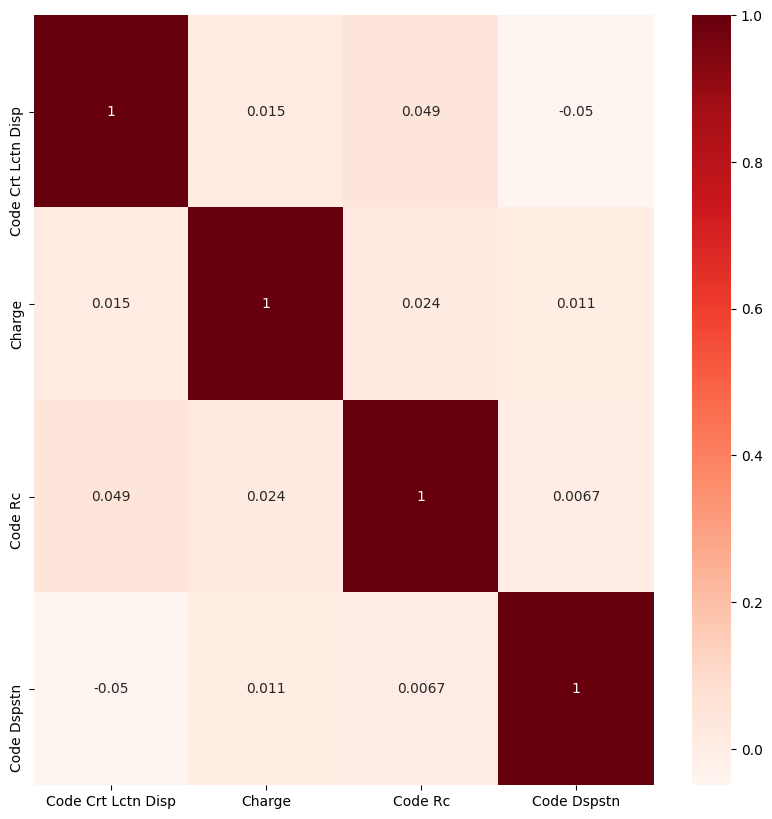

In [24]:
# make heatmap of correlation matrix
corr = norfolk_label_encoded.corr()
figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

Race 4.9% correlated to court location

Court location correlated to Disposition 5% --> Race correlated to disposition

In [25]:
# what is the most popular charge?
norfolk['Charge'].value_counts()

90/23/D        15695
265/13A/B      14145
266/30/A        9272
90/34J          8779
89/4A           8238
               ...  
350CMR201/C        1
265/37/C           1
90B/38             1
266/147/B          1
140D/31            1
Name: Charge, Length: 1114, dtype: int64

# no. 1 charge is License Suspended

In [50]:
# locate rows where charge is '90/23/D' (LICENSE SUSPENDED, OP MV WITH c90 ?23)
license_sus = norfolk[norfolk['Charge'] == '90/23/D']

In [68]:
# license_sus if Code Rc == 'C' then Code Rc == 'Caucasian', if Code Rc == 'B' then Code Rc is 'Black', if Code Rc == 'H' then Code Rc is 'Hispnaic', else Code Rc is 'Other'
license_sus['Code Rc'] = np.where(license_sus['Code Rc'] == 'C', 'Caucasian', np.where(license_sus['Code Rc'] == 'B', 'Black', np.where(license_sus['Code Rc'] == 'H', 'Hispanic', 'Other')))
license_sus

/var/folders/96/2td9rs4907lgb9p7msqfyqrm0000gn/T/ipykernel_95229/3961529815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  license_sus['Code Rc'] = np.where(license_sus['Code Rc'] == 'C', 'Caucasian', np.where(license_sus['Code Rc'] == 'B', 'Black', np.where(license_sus['Code Rc'] == 'H', 'Hispanic', 'Other')))


,Id Cs,Date Crm,Code Crt Lctn Disp,Charge,Code Rc,Code Dspstn
12,223347,2014-01-17 12:00AM,nan,90/23/D,Other,PLEA
16,230442,2014-07-03 12:00AM,nan,90/23/D,Other,PLEA
31,259834,2016-04-12 12:00AM,QDC,90/23/D,Other,DISM
32,271694,2017-06-20 12:00AM,nan,90/23/D,Other,DISM
34,277524,2017-08-05 12:00AM,nan,90/23/D,Other,DISM
...,...,...,...,...,...,...
505146,321921,2021-11-07 12:00AM,SDC,90/23/D,Other,DISM
505169,321969,2021-11-07 12:00AM,SDC,90/23/D,Other,DISM
505208,321991,2021-03-09 12:00AM,QDC,90/23/D,Other,DISM
505442,322188,2022-01-14 12:00AM,QDC,90/23/D,Other,DISM


In [62]:
# drop rows if Code Dspstn != PLEA or DISM
license_sus_crop = license_sus[license_sus['Code Dspstn'].isin(['PLEA', 'DISM'])]

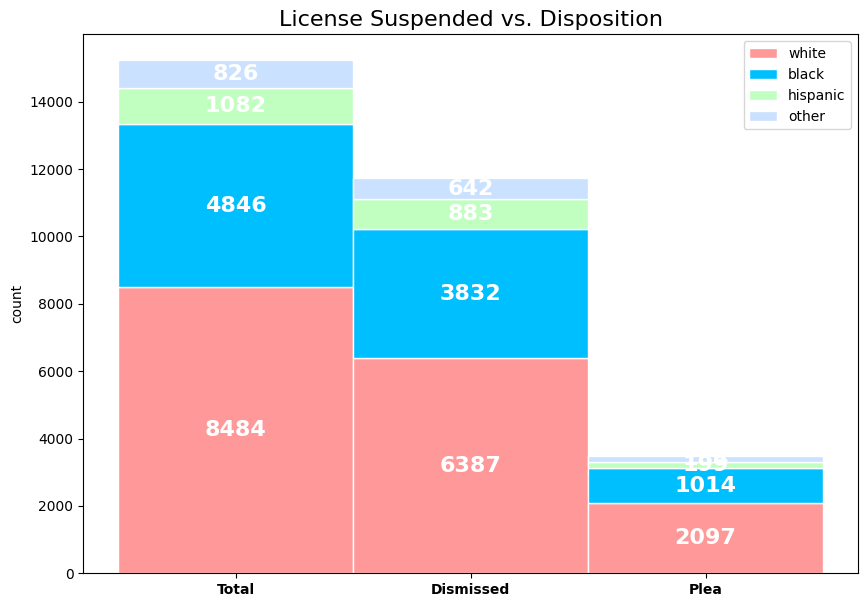

In [88]:
# stacked bar plot
import numpy as np
import matplotlib.pyplot as plt
#Get values from the group and categories
dispositions = ["Total", "Dismissed", "Plea"]
# total number of Code Rc = caucasian
white = [len(license_sus_crop[license_sus_crop['Code Rc'] == 'Caucasian']), len(license_sus_crop[(license_sus_crop['Code Rc'] == 'Caucasian') & (license_sus_crop['Code Dspstn'] == 'DISM')]), len(license_sus_crop[(license_sus_crop['Code Rc'] == 'Caucasian') & (license_sus_crop['Code Dspstn'] == 'PLEA')])]
black = [len(license_sus_crop[license_sus_crop['Code Rc'] == 'Black']), len(license_sus_crop[(license_sus_crop['Code Rc'] == 'Black') & (license_sus_crop['Code Dspstn'] == 'DISM')]), len(license_sus_crop[(license_sus_crop['Code Rc'] == 'Black') & (license_sus_crop['Code Dspstn'] == 'PLEA')])]
hispanic = [len(license_sus_crop[license_sus_crop['Code Rc'] == 'Hispanic']), len(license_sus_crop[(license_sus_crop['Code Rc'] == 'Hispanic') & (license_sus_crop['Code Dspstn'] == 'DISM')]), len(license_sus_crop[(license_sus_crop['Code Rc'] == 'Hispanic') & (license_sus_crop['Code Dspstn'] == 'PLEA')])]
other = [len(license_sus_crop[license_sus_crop['Code Rc'] == 'Other']), len(license_sus_crop[(license_sus_crop['Code Rc'] == 'Other') & (license_sus_crop['Code Dspstn'] == 'DISM')]), len(license_sus_crop[(license_sus_crop['Code Rc'] == 'Other') & (license_sus_crop['Code Dspstn'] == 'PLEA')])]
    
#add colors
colors = ['#FF9999', '#00BFFF','#C1FFC1','#CAE1FF','#FFDEAD']
# The position of the bars on the x-axis
r = range(len(dispositions))
barWidth = 1
#plot bars
plt.figure(figsize=(10,7))
ax1 = plt.bar(r, white, color=colors[0], edgecolor='white', width=barWidth, label="white")
ax2 = plt.bar(r, black, bottom=np.array(white), color=colors[1], edgecolor='white', width=barWidth, label='black')
ax3 = plt.bar(r, hispanic, bottom=np.array(white)+np.array(black), color=colors[2], edgecolor='white', width=barWidth, label='hispanic')
ax4 = plt.bar(r, other, bottom=np.array(white)+np.array(black)+np.array(hispanic), color=colors[3], edgecolor='white', width=barWidth, label='other')
plt.legend()
# Custom X axis
plt.xticks(r, dispositions, fontweight='bold')
plt.ylabel("count")
for r1, r2, r3, r4 in zip(ax1, ax2, ax3, ax4):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    h4 = r4.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%d" % h3, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r4.get_x() + r4.get_width() / 2., h1 + h2 + h3 + h4 / 2., "%d" % h4, ha="center", va="center", color="white", fontsize=16, fontweight="bold")

# set title
plt.title("License Suspended vs. Disposition", loc='center', fontsize=16, fontweight=0, color='black')

plt.show()


# no. 2 is Assault and Battery: 265/13A/B (A&B c265 ?13A)

In [82]:
# rows where charge is 265/13A/B (A&B c265 ?13A) - assault & battery
assault_battery = norfolk[norfolk['Charge'] == '265/13A/B']

In [83]:
# license_sus if Code Rc == 'C' then Code Rc == 'Caucasian', if Code Rc == 'B' then Code Rc is 'Black', if Code Rc == 'H' then Code Rc is 'Hispnaic', else Code Rc is 'Other'
assault_battery['Code Rc'] = np.where(assault_battery['Code Rc'] == 'C', 'Caucasian', np.where(assault_battery['Code Rc'] == 'B', 'Black', np.where(assault_battery['Code Rc'] == 'H', 'Hispanic', 'Other')))
assault_battery

/var/folders/96/2td9rs4907lgb9p7msqfyqrm0000gn/T/ipykernel_95229/3216589054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assault_battery['Code Rc'] = np.where(assault_battery['Code Rc'] == 'C', 'Caucasian', np.where(assault_battery['Code Rc'] == 'B', 'Black', np.where(assault_battery['Code Rc'] == 'H', 'Hispanic', 'Other')))


,Id Cs,Date Crm,Code Crt Lctn Disp,Charge,Code Rc,Code Dspstn
6,212553,2013-05-19 12:00AM,nan,265/13A/B,Caucasian,DISM
7,212554,2013-05-19 12:00AM,nan,265/13A/B,Caucasian,DISM
27,116282,2007-04-24 12:00AM,QDC,265/13A/B,Caucasian,DISM
44,296777,2019-05-09 12:00AM,nan,265/13A/B,Other,NOPR
71,117924,2007-06-05 12:00AM,DDC,265/13A/B,Caucasian,DISM
...,...,...,...,...,...,...
501291,133019,2008-04-22 12:00AM,nan,265/13A/B,Caucasian,DISM
501292,142229,2008-08-02 12:00AM,nan,265/13A/B,Caucasian,DISM
501731,318726,2021-09-12 12:00AM,nan,265/13A/B,Caucasian,DISM
501732,318726,2021-09-12 12:00AM,nan,265/13A/B,Caucasian,DISM


In [85]:
# drop rows if Code Dspstn != PLEA or DISM
assault_battery_crop = assault_battery[assault_battery['Code Dspstn'].isin(['PLEA', 'DISM'])]

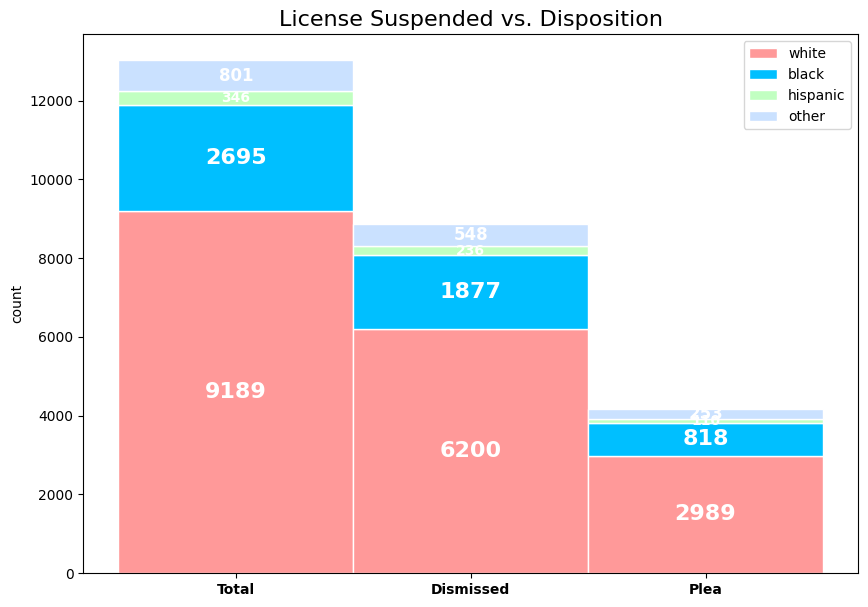

In [90]:
# stacked bar plot
import numpy as np
import matplotlib.pyplot as plt
#Get values from the group and categories
dispositions = ["Total", "Dismissed", "Plea"]
# total number of Code Rc = caucasian
white = [
    len(assault_battery_crop[assault_battery_crop['Code Rc'] == 'Caucasian']), 
    len(assault_battery_crop[(assault_battery_crop['Code Rc'] == 'Caucasian') & (assault_battery_crop['Code Dspstn'] == 'DISM')]), 
    len(assault_battery_crop[(assault_battery_crop['Code Rc'] == 'Caucasian') & (assault_battery_crop['Code Dspstn'] == 'PLEA')])
    ]
black = [len(assault_battery_crop[assault_battery_crop['Code Rc'] == 'Black']), len(assault_battery_crop[(assault_battery_crop['Code Rc'] == 'Black') & (assault_battery_crop['Code Dspstn'] == 'DISM')]), len(assault_battery_crop[(assault_battery_crop['Code Rc'] == 'Black') & (assault_battery_crop['Code Dspstn'] == 'PLEA')])]
hispanic = [len(assault_battery_crop[assault_battery_crop['Code Rc'] == 'Hispanic']), len(assault_battery_crop[(assault_battery_crop['Code Rc'] == 'Hispanic') & (assault_battery_crop['Code Dspstn'] == 'DISM')]), len(assault_battery_crop[(assault_battery_crop['Code Rc'] == 'Hispanic') & (assault_battery_crop['Code Dspstn'] == 'PLEA')])]
other = [len(assault_battery_crop[assault_battery_crop['Code Rc'] == 'Other']), len(assault_battery_crop[(assault_battery_crop['Code Rc'] == 'Other') & (assault_battery_crop['Code Dspstn'] == 'DISM')]), len(assault_battery_crop[(assault_battery_crop['Code Rc'] == 'Other') & (assault_battery_crop['Code Dspstn'] == 'PLEA')])]
    
#add colors
colors = ['#FF9999', '#00BFFF','#C1FFC1','#CAE1FF','#FFDEAD']
# The position of the bars on the x-axis
r = range(len(dispositions))
barWidth = 1
#plot bars
plt.figure(figsize=(10,7))
ax1 = plt.bar(r, white, color=colors[0], edgecolor='white', width=barWidth, label="white")
ax2 = plt.bar(r, black, bottom=np.array(white), color=colors[1], edgecolor='white', width=barWidth, label='black')
ax3 = plt.bar(r, hispanic, bottom=np.array(white)+np.array(black), color=colors[2], edgecolor='white', width=barWidth, label='hispanic')
ax4 = plt.bar(r, other, bottom=np.array(white)+np.array(black)+np.array(hispanic), color=colors[3], edgecolor='white', width=barWidth, label='other')
plt.legend()
# Custom X axis
plt.xticks(r, dispositions, fontweight='bold')
plt.ylabel("count")
for r1, r2, r3, r4 in zip(ax1, ax2, ax3, ax4):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    h4 = r4.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%d" % h3, ha="center", va="center", color="white", fontsize=10, fontweight="bold")
    plt.text(r4.get_x() + r4.get_width() / 2., h1 + h2 + h3 + h4 / 2., "%d" % h4, ha="center", va="center", color="white", fontsize=12, fontweight="bold")

# set title
plt.title("License Suspended vs. Disposition", loc='center', fontsize=16, fontweight=0, color='black')

plt.show()


In [116]:
# value counts for Charge Description that contain 'DRUG'
# if chaerge description is na drop the row
norfolk_df['Charge Description'] = norfolk_df['Charge Description'].fillna('na')
print(norfolk_df['Charge Description'].isna().sum())

0


In [117]:
norfolk_df[norfolk_df['Charge Description'].str.contains('DRUG')]['Charge Description'].value_counts()

DRUG, POSSESS CLASS B c94C ?34                          6442
CONSPIRACY TO VIOLATE DRUG LAW c94C ?40                 6016
DRUG, POSSESS CLASS A c94C ?34                          3318
DRUG, POSSESS CLASS D c94C ?34                          3268
DRUG, POSSESS CLASS E c94C ?34                          3199
                                                        ... 
DRUG, POSSESS TO DISTR TO MINOR CLASS C c94C ?32F(c)       1
BOAT OUI?DRUGS, 3RD OFFENSE c90B ?8(a)                     1
BOAT OUI?DRUGS, 2ND OFFENSE c90B ?8(a)                     1
DRUG, DISPENSE W/O PRESCRIPTION c94C ?25(1)                1
DRUG, FALSE REGIS NUMBER FOR, SUBSQ.OFF. c94C ?33(c)       1
Name: Charge Description, Length: 72, dtype: int64

In [118]:
# what Charge is when Charge Description = DRUG, POSSESS CLASS B c94C ?34
norfolk_df[norfolk_df['Charge Description'] == 'DRUG, POSSESS CLASS B c94C ?34']['Charge'].value_counts()

94C/34/C    6442
Name: Charge, dtype: int64

# DRUG, POSSESS CLASS B c94C ?34 

In [120]:
drug_possess_b = norfolk[norfolk['Charge'] == '94C/34/C']

In [121]:
# license_sus if Code Rc == 'C' then Code Rc == 'Caucasian', if Code Rc == 'B' then Code Rc is 'Black', if Code Rc == 'H' then Code Rc is 'Hispnaic', else Code Rc is 'Other'
drug_possess_b['Code Rc'] = np.where(drug_possess_b['Code Rc'] == 'C', 'Caucasian', np.where(drug_possess_b['Code Rc'] == 'B', 'Black', np.where(drug_possess_b['Code Rc'] == 'H', 'Hispanic', 'Other')))
drug_possess_b

/var/folders/96/2td9rs4907lgb9p7msqfyqrm0000gn/T/ipykernel_95229/216076568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_possess_b['Code Rc'] = np.where(drug_possess_b['Code Rc'] == 'C', 'Caucasian', np.where(drug_possess_b['Code Rc'] == 'B', 'Black', np.where(drug_possess_b['Code Rc'] == 'H', 'Hispanic', 'Other')))


,Id Cs,Date Crm,Code Crt Lctn Disp,Charge,Code Rc,Code Dspstn
18,262595,2016-10-10 12:00AM,WDC,94C/34/C,Caucasian,DISM
74,198080,2012-06-08 12:00AM,nan,94C/34/C,Caucasian,DISM
239,282285,2017-12-08 12:00AM,QDC,94C/34/C,Caucasian,PLEA
240,287252,2018-05-16 12:00AM,QDC,94C/34/C,Caucasian,PLEA
382,170559,2010-07-13 12:00AM,QDC,94C/34/C,Caucasian,PLEA
...,...,...,...,...,...,...
500143,317232,2021-07-19 12:00AM,QDC,94C/34/C,Black,DISM
500358,317419,2021-07-26 12:00AM,nan,94C/34/C,Caucasian,PLEA
500901,318356,2021-05-25 12:00AM,WDC,94C/34/C,Caucasian,DISM
500902,318356,2021-05-25 12:00AM,WDC,94C/34/C,Caucasian,DISM


In [122]:
# drop rows if Code Dspstn != PLEA or DISM
drug_possess_b = drug_possess_b[drug_possess_b['Code Dspstn'].isin(['PLEA', 'DISM'])]

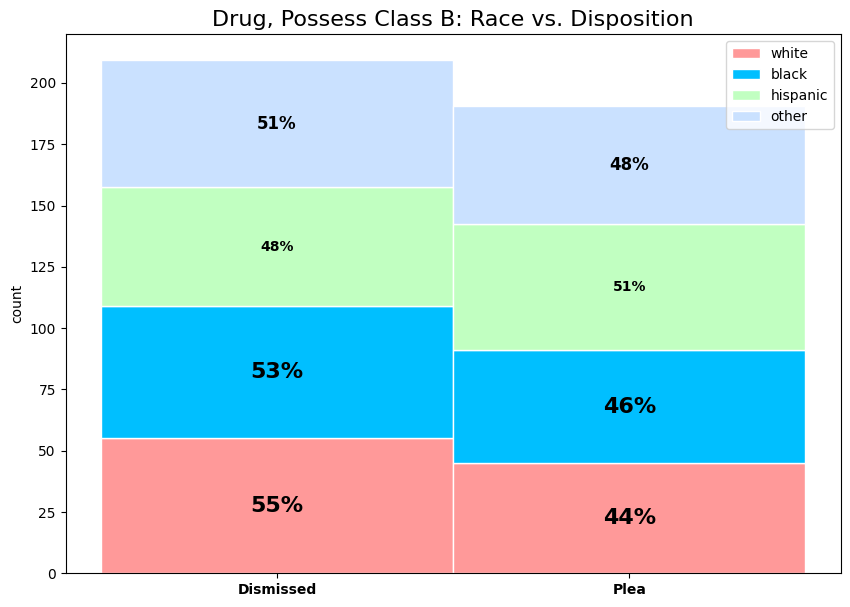

In [128]:
#Get values from the group and categories
dispositions = ["Dismissed", "Plea"]
races = ["Caucasian", "Black", "Hispanic", "Other"]

total_white = len(drug_possess_b[drug_possess_b['Code Rc'] == races[0]])
total_black = len(drug_possess_b[drug_possess_b['Code Rc']  == races[1]])
total_hispanic = len(drug_possess_b[drug_possess_b['Code Rc']  == races[2]])
total_other = len(drug_possess_b[drug_possess_b['Code Rc'] == races[3]])

# total number of Code Rc = caucasian
white = [
    len(drug_possess_b[(drug_possess_b['Code Rc'] == 'Caucasian') & (drug_possess_b['Code Dspstn'] == 'DISM')])  / total_white * 100,
    len(drug_possess_b[(drug_possess_b['Code Rc'] == 'Caucasian') & (drug_possess_b['Code Dspstn'] == 'PLEA')])  / total_white * 100
    ]
black = [
    len(drug_possess_b[(drug_possess_b['Code Rc'] == 'Black') & (drug_possess_b['Code Dspstn'] == 'DISM')]) / total_black * 100, 
    len(drug_possess_b[(drug_possess_b['Code Rc'] == 'Black') & (drug_possess_b['Code Dspstn'] == 'PLEA')]) / total_black * 100
    ]
hispanic = [
    len(drug_possess_b[(drug_possess_b['Code Rc'] == 'Hispanic') & (drug_possess_b['Code Dspstn'] == 'DISM')]) / total_hispanic * 100, 
    len(drug_possess_b[(drug_possess_b['Code Rc'] == 'Hispanic') & (drug_possess_b['Code Dspstn'] == 'PLEA')]) / total_hispanic * 100
    ]
other = [
    len(drug_possess_b[(drug_possess_b['Code Rc'] == 'Other') & (drug_possess_b['Code Dspstn'] == 'DISM')]) / total_other * 100,
    len(drug_possess_b[(drug_possess_b['Code Rc'] == 'Other') & (drug_possess_b['Code Dspstn'] == 'PLEA')]) / total_other * 100
    ]

#add colors
colors = ['#FF9999', '#00BFFF','#C1FFC1','#CAE1FF','#FFDEAD']
# The position of the bars on the x-axis
r = range(len(dispositions))
barWidth = 1
#plot bars
plt.figure(figsize=(10,7))
ax1 = plt.bar(r, white, color=colors[0], edgecolor='white', width=barWidth, label="white")
ax2 = plt.bar(r, black, bottom=np.array(white), color=colors[1], edgecolor='white', width=barWidth, label='black')
ax3 = plt.bar(r, hispanic, bottom=np.array(white)+np.array(black), color=colors[2], edgecolor='white', width=barWidth, label='hispanic')
ax4 = plt.bar(r, other, bottom=np.array(white)+np.array(black)+np.array(hispanic), color=colors[3], edgecolor='white', width=barWidth, label='other')
plt.legend()
# Custom X axis
plt.xticks(r, dispositions, fontweight='bold')
plt.ylabel("count")
for r1, r2, r3, r4 in zip(ax1, ax2, ax3, ax4):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    h4 = r4.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1 + "%", ha="center", va="center", color="black", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2 + "%", ha="center", va="center", color="black", fontsize=16, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%d" % h3 + "%", ha="center", va="center", color="black", fontsize=10, fontweight="bold")
    plt.text(r4.get_x() + r4.get_width() / 2., h1 + h2 + h3 + h4 / 2., "%d" % h4 + "%", ha="center", va="center", color="black", fontsize=12, fontweight="bold")

# set title
plt.title("Drug, Possess Class B: Race vs. Disposition", loc='center', fontsize=16, fontweight=0, color='black')

plt.show()
